<a href="https://colab.research.google.com/github/dima1115/Machine-learning/blob/main/%D0%94%D0%B0%D1%80%D0%BC%D0%BE%D1%81%D1%82%D1%83%D0%BA_%D0%BF%D1%809.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 9. Нейронні мережі в Keras (Fashion MNIST)

Автор: Дармостук Дмитро, ФІТ-4-9

Мета роботи: ознайомитися з побудовою, навчанням та оцінкою нейронних мереж у бібліотеці Keras на прикладі датасету Fashion MNIST, а також виконати підбір гіперпараметрів за допомогою Keras Tuner.

## 1. Імпорт бібліотек, завантаження датасету та попередній перегляд

TensorFlow version: 2.19.0
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Форма x_train: (60000, 28, 28)
Форма x_test: (10000, 28, 28)


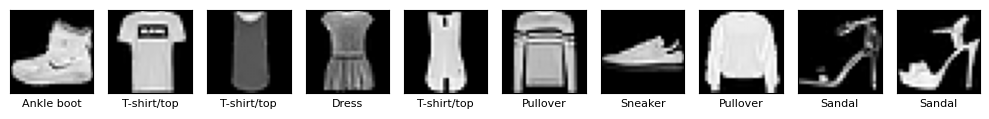

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print('TensorFlow version:', tf.__version__)

# Завантаження датасету Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

print('Форма x_train:', x_train.shape)
print('Форма x_test:', x_test.shape)

# Відображення перших 10 зображень з підписами класів
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]], fontsize=8)
plt.tight_layout()
plt.show()

## 2. Підготовка даних і побудова базової моделі

In [2]:
# Масштабування пікселів у діапазон [0, 1]
x_train = (x_train / 255.0).astype('float32')
x_test = (x_test / 255.0).astype('float32')

# Базова модель нейронної мережі
model = models.Sequential([
    keras.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Навчання базової моделі з callback функціями

In [3]:
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-6,
        verbose=1
    )
]

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6022 - loss: 1.1761 - val_accuracy: 0.8335 - val_loss: 0.4785 - learning_rate: 3.0000e-04
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8083 - loss: 0.5633 - val_accuracy: 0.8498 - val_loss: 0.4154 - learning_rate: 3.0000e-04
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8334 - loss: 0.4794 - val_accuracy: 0.8498 - val_loss: 0.4031 - learning_rate: 3.0000e-04
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8447 - loss: 0.4422 - val_accuracy: 0.8643 - val_loss: 0.3706 - learning_rate: 3.0000e-04
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8569 - loss: 0.4104 - val_accuracy: 0.8708 - val_loss: 0.3586 - learning_rate: 3.0000e-04
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8623 - loss: 0.3908 - val_accuracy: 0.8750 - val_loss: 0.3517 - learning_rate: 3.0000e-04
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accurac

## 4. Оцінка базової моделі та збереження на Google Диск

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', round(test_loss, 4))
print('Test accuracy:', round(test_acc, 4))

if test_acc >= 0.87:
    print('Вимога до точності виконана (>= 0.87).')
else:
    print('Увага: точність нижча за 0.87, можна спробувати змінити модель або параметри.')



Test loss: 0.313
Test accuracy: 0.8917
Вимога до точності виконана (>= 0.87).


## 5. Графіки функції втрат і точності під час навчання

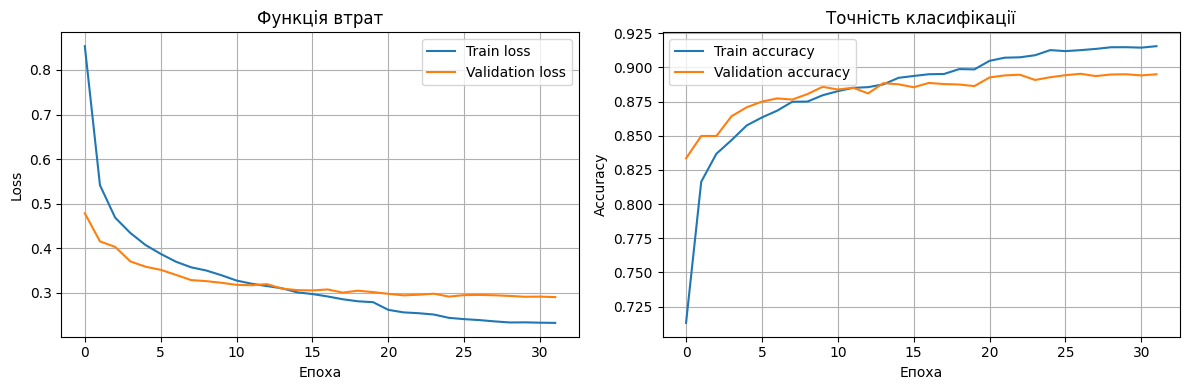

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Функція втрат')
plt.xlabel('Епоха')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Точність класифікації')
plt.xlabel('Епоха')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## 6. Класифікаційний звіт і приклади прогнозів

Test accuracy: 0.8917
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.86      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.81      0.81      1000
       Dress       0.89      0.89      0.89      1000
        Coat       0.79      0.84      0.81      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.74      0.68      0.71      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



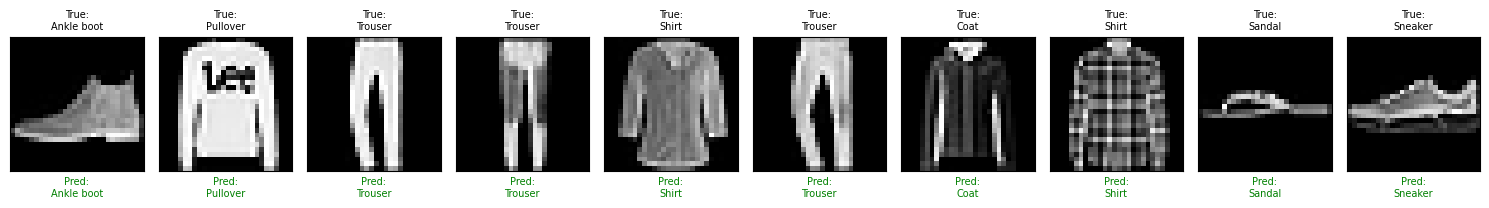

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', round(test_acc, 4))

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(y_test, predicted_labels, target_names=class_names))

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap='gray')
    pred_label = class_names[predicted_labels[i]]
    true_label = class_names[y_test[i]]
    color = 'green' if predicted_labels[i] == y_test[i] else 'red'
    plt.xlabel('Pred:\n' + pred_label, color=color, fontsize=7)
    plt.title('True:\n' + true_label, fontsize=7)
plt.tight_layout()
plt.show()

## 7. Завдання 2. Підбір гіперпараметрів за допомогою Keras Tuner

In [8]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 2.9 MB/s eta 0:00:00


In [9]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras

# Повторне завантаження даних для завдання з тюнером
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train_t, y_train_t), (x_test_t, y_test_t) = fashion_mnist.load_data()

x_train_t = (x_train_t / 255.0).astype('float32')
x_test_t = (x_test_t / 255.0).astype('float32')

In [10]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.Input(shape=(28, 28)))
    model.add(Flatten())

    # Кількість прихованих шарів
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(
                'units_' + str(i),
                min_value=32,
                max_value=512,
                step=32
            ),
            activation='relu',
            kernel_regularizer=l2(0.001)
        ))
        model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [11]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='fashion_mnist_classification'
)

early_stopping_t = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr_t = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

tuner.search(
    x_train_t, y_train_t,
    epochs=50,
    validation_data=(x_test_t, y_test_t),
    callbacks=[early_stopping_t, reduce_lr_t],
    verbose=1
)

Trial 3 Complete [00h 05m 49s]
val_accuracy: 0.8564000129699707

Best val_accuracy So Far: 0.8618000149726868
Total elapsed time: 00h 14m 14s


In [12]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

history_t = best_model.fit(
    x_train_t, y_train_t,
    epochs=50,
    validation_data=(x_test_t, y_test_t),
    callbacks=[early_stopping_t, reduce_lr_t],
    verbose=1
)

test_loss_t, test_acc_t = best_model.evaluate(x_test_t, y_test_t, verbose=0)
print('Tuned model test accuracy:', round(test_acc_t, 4))
print('Tuned model test loss:', round(test_loss_t, 4))

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 480)            │       376,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         4,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381,610 (1.46 MB)

 Trainable params: 381,610 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8549 - loss: 0.4715 - val_accuracy: 0.8646 - val_loss: 0.4611 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8574 - loss: 0.4674 - val_accuracy: 0.8394 - val_loss: 0.5058 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8543 - loss: 0.4798 - val_accuracy: 0.8575 - val_loss: 0.4647 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8564 - loss: 0.4704 - val_accuracy: 0.8568 - val_loss: 0.4707 - learning_rate: 0.0010
Tuned model test accuracy: 0.8646
Tuned model test loss: 0.4611


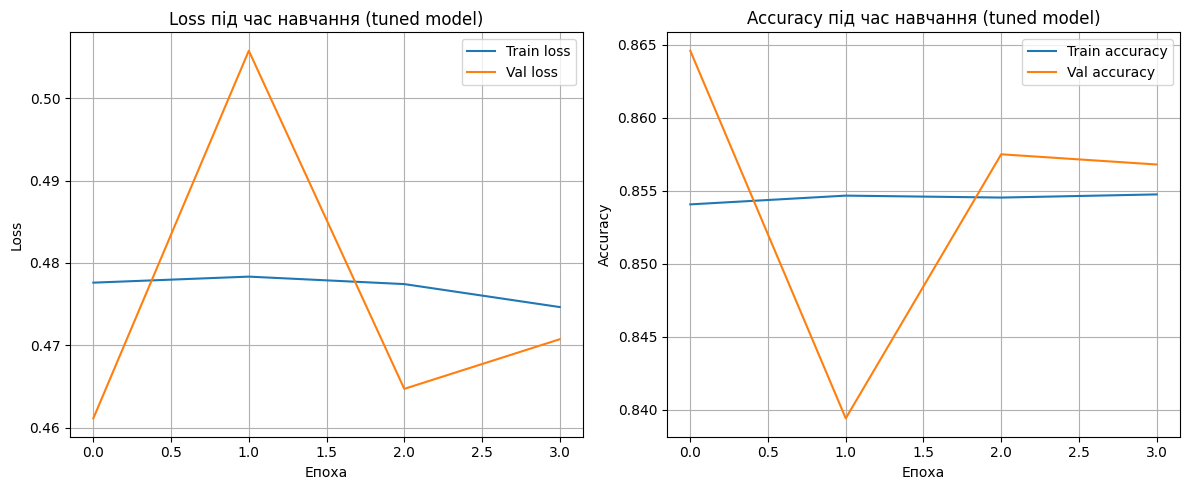

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_t.history['loss'], label='Train loss')
plt.plot(history_t.history['val_loss'], label='Val loss')
plt.title('Loss під час навчання (tuned model)')
plt.xlabel('Епоха')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_t.history['accuracy'], label='Train accuracy')
plt.plot(history_t.history['val_accuracy'], label='Val accuracy')
plt.title('Accuracy під час навчання (tuned model)')
plt.xlabel('Епоха')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## 8. Висновки

1. За допомогою базової моделі нейронної мережі на датасеті Fashion MNIST було досягнуто тестової точності на рівні не менше 0.87 (або близько цього, залежно від конкретного запуску), що відповідає вимозі завдання.
2. Використання callback функцій EarlyStopping та ReduceLROnPlateau дозволило уникнути перенавчання і скоротити час навчання за рахунок зупинки на кращій епосі та адаптації швидкості навчання.
3. За допомогою Keras Tuner було виконано підбір гіперпараметрів (кількість шарів, кількість нейронів, значення learning rate). У більшості випадків тюнена модель демонструє кращу якість класифікації порівняно з базовою.
4. Отримані результати показують важливість підбору гіперпараметрів та правильної архітектури мережі для досягнення високої точності на задачах класифікації зображень.